# Código de Hamming

Cuando uno debe mandar un número dado de resultados, a cada uno de estos resultados se le debe asignar un nombre en binario. La primera aproximación es la de asignar a todos un nombre con la misma cantidad de bits, por ejemplo, asignando:

- 00
- 01
- 10
- 11

a un grupo de 4 resultados. Lo que funciona bien cuando los 4 resultados tienen la misma probabilidad de salir. 
Sin embargo, esto nos da que por cada uno de los resultados se deben andar 2 bits y cuando las probabilidades son distintas es posible diseñar un método que permita asignar nombres más cortos a los resutados más probables y nombres largos a los menos probabilidad. Si eso se hace, es posible calcular la longitud promedio por resultado y obtener que en promedio los mensajes que se mandan son más cortos. Es ahí donde entra la codificación de Hamming para desarrollar el método más eficiente de asignar nombres a un grupo de resultados con distintas probabilidades conocidas.

Si en el caso anterior se tiene que los resutados tienen probabilidades de 0.5, 0.25, 0.125, 0.125 respectivamente, entonces se les pueden asignar los siguientes nombres:

- 0
- 10
- 110
- 111

En este caso lo que tenemos es que el resultado uno, que sale la mitad de las veces, tiene una longitud de apenas 1 bit. Hay algunos resultados que son más largos (3 bits en este caso) pero que aparecen rara vez por su baja probabilidad. En este caso es posible calcular la longitud promedio como:

\begin{equation}
\langle L \rangle = \sum_i p_i * l_i = 0.5 * 1 \text{bit} + 0.25 * 2 \text{bit} + 0.125 * 3 \text{bit} + 0.125 * 3 \text{bit} = 1.75 \text{bit}
\end{equation}

donde se puede ver que obtenemos que en promedio la lóngitud de un resultado es menor que 2 y se obtiene una códificación más eféctiva que la tradicional.

## ¿Cómo funciona?

En este punto surgen 2 preguntas sobre el funcionamiento de esta codificación. En primer lugar, surge la pregunta de cómo se hace, cómo se encuentra está forma eficiente de codificar la información. En segundo surge la duda de cómo hago yo para interpretar una secuencia de datos. La primera de estas dudas se trabajará ahora con más detalle, entonces resolvamos aca la segunda.

Con la forma tradicional, se sabe que en una secuencia de información que se recibe, cada cierto número de bits tengo un resultado. Por ejemplo, en el caso que se trabajo en el punto anterior, sé que cada 2 bits tengo un resultado. ¿Cómo hago con la otra codificación en la que algunos resultados tienen más y otros menos bits? La clave está en que ninguno de los nombres comienza igual, luego una secuencia dada de datos es única para ese resultado. Veamos un ejemplo.

Usando el ejemplo de 4 resultados con las probabilidades dadas arriba, se recibe la siguiente secuencia de datos que contiene 8 bits:

```
00101110
```

Usando la codificación usual, en este caso se tiene que hay 4 resultados y cada 2 bits representa uno de estos. En cambio, con la codificación de Hamming lo que se debe hacer es leer de izquierda a derecha e ir viendo el coportamiento bit por bit. Al leer el primer bit, si es 0, entonces se tiene el primer resultado porque es e único que empieza con 0. Si es 1 se sabe que es uno de los otros 3, luego se mira el siguiente bit con el que se realiza el mismo proceso. Luego se separa de la siguiente forma:

```
0|0|10|111|0|
```

En este caso, se obtiene que con una misma secuencia de 8 digitos, ahora es posible mandar 5 resultados optimizando la forma de codificar la información. Esto puede ser muy útil cuando cuando se quiere enviar la información y esto tiene un costo con lo que es posible ahorrar.

## Algoritmo

Ahora, para responder nuestra pregunta inicial, tenemos las siguientes condiciones:

- **Entrada:** Una lista de probabilidades correspondientes a cada una de los posibles resultados.

- **Salida:** El código de Hamming correspondiente a cada uno de dichos resultados.

El proceso a usar para obtener la salida deseada es, entonces:

1. Ordenar la lista de mayor a menor.

2. Sumar los dos últimos elementos de la lista.

3. Reescriba la lista cambiando los 2 últimos elementos por la suma en el paso 2 y ordenarla de mayor a menor.

4. Asocie la posición de la suma a los 2 elementos que la conforman.

5. Repita pasos 2-4 hasta que la lista se haya reducido a una lista de 2 elementos.

6. A los números de la lista original que conforman el elemento menor, asigneles un 1.

7. A los otros, asigneles un 0.

8. Repita los pasos 6 y 7 usando los dos menores números en las listas del proceso de reducción hasta que regrese a la lista original.

En este punto, cada elemento de la lista original, tiene su código de hamming asociado. 

Hagamos este proceso manual una vez con e mismo ejemplo de arriba para ver de donde sale el código que usamos:

Probabilidades: (0.5, 0.25, 0.125, 0.125)

#### Paso 1: Ordenar

- 0.5
- 0.25
- 0.125
- 0.125

#### Paso 2: Sumar

$0.125 + 0.125 = 0.25 $

#### Paso 3: Reescribir

- 0.5
- 0.25
- 0.25

#### Paso 4: Asociar

En este caso el últimmo digito se asocia a los 2 últimos de la lista anterior.

#### Paso 5: Seguir

Repito este proceso y almaceno la historia de forma al final la lista me queda reducida a 

- 0.5
- 0.5

Dónde se tiene que la historia de os 4 en este proceso es

- 111
- 222
- 332
- 432

#### Pasos 6 y 7: códificar

El elemento menor en esta ista final está conformado por los resultados 2, 3 y 4 a esos les asigno un 1 y al otro se le asigna un 0. Luego se tiene:

- 0
- 1
- 1
- 1

#### Paso 8: Continuar

Se repite eso en as iteraciones, entoncespaso a ver el paso anterior en la iteración y reviso los 2 últimos eementos y asi sucesivamente. Se obtiene entonces:

- 0
- 10
- 110
- 111

## Implementación Computacional
### Entrada

In [1]:
# Set up:
entrada = (0.5, 0.25, 0.125, 0.125)

### Primera parte: Reducción
Acá definiremos los pasos 1 a 5. Es importante almacenar el orden en este proceso de reducción.

In [2]:
def reduce_step(ordered, history):
    n = len(ordered)
    # Paso 1: La lista de probabilidades entra ya ordenada. Esto se implementa en las funciones siguientes.
    # Paso 2:
    sum_last2 = ordered[-1] + ordered[-2]
    # Paso 3:
    nlist = [i for i in ordered[:-2]] + [sum_last2]
    sorted_nlist = sorted(nlist, reverse = True)
    # Paso 4:
    index = sorted_nlist.index(sum_last2) 
    
    for i, element in enumerate(history):
        if element[-1] < index:
            history[i].append(element[-1])
        elif (element[-1] >= index) and (element[-1] < n-2):
            history[i].append(element[-1] + 1)
        elif element[-1] >= n-2:
            history[i].append(index)
        
    return sorted_nlist
    
def reduce_list(probabilities):
    n = 1
    hist = [[i] for i in range(len(probabilities))]
    # Implementacion paso 1:
    step = sorted([i for i in probabilities], reverse=True)

    # Paso 5:
    while len(step) > 2:
        step = reduce_step(step, hist)
        n+=1
    return hist, n

### Segunda Parte: Almacenar y generar el código de hamming
Ejecutamos los pasos del 1 al 5, y realizamos los pasos del 6 al 8

In [3]:
def hamming(probabilities):
    # Ejecutar pasos del 1 al 5
    ordered_prob = sorted(probabilities, reverse = True)
    history, steps = reduce_list(ordered_prob)
    hamming = ['' for p in probabilities]
    for step in range(steps):
        for n, item in enumerate(history):
            # Paso 6:
            if item[-(step+1)] == step:
                hamming[n] += '0'
            # Paso 7:
            elif item[-(step+1)] == step + 1:
                hamming[n] += '1'

    # Paso 8:
    return tuple(zip(ordered_prob, hamming))

### Salida

In [4]:
test = hamming(list(entrada))

test

((0.5, '1'), (0.25, '01'), (0.125, '000'), (0.125, '001'))

#### Nota 

A la hora de almacenar la historia, si el resultado de la suma da un valor igual al de otra de las probabilidades, el código le hace el seguimiento en la historia a la primera de estas probabilidades iguales, mientras que uno al hacerlo manual suele escoger la última. Esto hace que en algunos casos la codificación que se obtiene del código puede ser diferente a la que obtiene uno manual. Sin embargo, en ambos casos la longitud promedio se mantiene igual ya que cuando esto sucede, las probabilidades son las mismas y da igual a cual de las 2 le doy el bit adicional.

### Longitud promedio

Dado que la ventaja que trae esta codificación se ve representada en la longitud promedio, entonces se implementa ahora una función que calcule esta longitud promedio.

In [5]:
def longitud_promedio(hamming):
    L=0
    for p, c in hamming:
        L += p * len(c)
        
    return L

longitud_promedio(test)

1.75

## Pruebas al Algoritmo
Comprobamos el algoritmo con diferentes entradas

In [6]:
entrada2 = (0.512, 0.128, 0.128, 0.128, 0.032, 0.032, 0.032, 0.008)
code = hamming(entrada2)
code

((0.512, '0'),
 (0.128, '100'),
 (0.128, '101'),
 (0.128, '110'),
 (0.032, '11100'),
 (0.032, '11101'),
 (0.032, '11110'),
 (0.008, '11111'))

Y hallamos la longitud promedio:

In [7]:
longitud_promedio(code)

2.184

Ahora con otra entrada:

In [8]:
entrada3 = (0.81, 0.09, 0.09, 0.01)
code = hamming(entrada3)
code

((0.81, '0'), (0.09, '11'), (0.09, '100'), (0.01, '101'))

Con longitud promedio

In [9]:
longitud_promedio(code)

1.29

Y finalmente con una última entrada de prueba:

In [10]:
entrada4 = (0.4, 0.15, 0.2, 0.05, 0.1, 0.05, 0.025, 0.025)
code = hamming(entrada4)
code

((0.4, '1'),
 (0.2, '000'),
 (0.15, '010'),
 (0.1, '0010'),
 (0.05, '0110'),
 (0.05, '0111'),
 (0.025, '00110'),
 (0.025, '00111'))

Con longitud promedio

In [11]:
longitud_promedio(code)

2.5000000000000004

## Entropía

Dado que estamos hablando de un numero dado de resultados posibles con una probabilidad dada, es posible entonces tomar los resultados como los posibles estados de un ensamble y se puede medir la entropía del sistema.

La información (en bits) que se obtiene en cada uno de los resultados esta dada por $I_i = -\log_2{p_i} $ y la entropía total está dada por la formula de Gibbs:

\begin{equation}
S = \sum_i p_i I_i
\end{equation}

Implementemos una función para esto.

In [12]:
import numpy as np

def entropia(hamming):
    S = 0
    for p, c in hamming:
        S += p*np.log2(p)

    return -1*S

entropia(test)

1.75

Dado que la entropía define la cantidad de información promedio que se recibe con cada resultado en bits, entonces define también la longitud promedio minima que se puede lograr en una codificación, ya que si la codificación de los resultados tiene una longitud promedio menor, entonces se estaría perdiendo información en el envío. Por lo tanto, en la celda anterior se puede ver que usando el método de Hamming en la prueba, se obtiene una codificación en el que la lóngitud promedio es igual a la entropía, es decir, el mínimo.

### ¿Qué sucede cuando se tiene únicamente 2 resutados? 

Vamos a trabajar acá un ejemplo para ver otras formas en las que se puede aplicar este código para optimizar la codificación de información. Supongamos que se tiene una situación con unicamente 2 resultados posibles, el primero $p_1$ tiene una probabilidad de 0.8 de salir y el segundo $p_2$ de 0.2. 

In [13]:
probabilidades = (0.8, 0.2)

El código para esta situación es sencillo, pues simplemente se le pone 0 a un resultado y 1 al otro. Dado que cada resultado tiene un número entero de bits, eso es lo mínimo y el método de Hamming dá el mismo resultado. Este código tiene una longitud promedio de 1 bit.

In [14]:
code = hamming(probabilidades)
code

((0.8, '0'), (0.2, '1'))

#### Entropía

Calculemos entonces la entropía de esta situación.

In [15]:
S = entropia(code)
S

0.7219280948873623

Se observa que en este caso la entropía da un número menor que la longitud, luego es posible imaginar que se puede optimizar aun más el envío de dicha información. Para esto, lo que se propone es mandar la información por paquetes de N resultados. Por ejemplo, para $N = 2$ se tiene ahora que los paquetes pueden ir de 4 formas:

- $p_1p_1$

- $p_1p_2$

- $p_2p_1$

- $p_2p_2$

Y dado que cada resultado en el paquete corresponde a mediciones diferentes, entonces son independientes y por tanto, la probabilidad de cada paquete está dada por la multiplicación de las probabilidades de cada uno de los resultados que conforman el paquete. En este caso, se tiene:

- $p_1p_1 = 0.64$

- $p_1p_2 = 0.16$

- $p_2p_1 = 0.16$

- $p_2p_2 = 0.04$

Veamos entonces como es el código para este sistema de paquetes: 

In [16]:
packet_2 = (0.64, 0.16, 0.16, 0.04)
code = hamming(packet_2)
code

((0.64, '0'), (0.16, '11'), (0.16, '100'), (0.04, '101'))

##### Nota 

Es importante tener en cuenta que la longitud promedio del código representa la longitud promedio para mandar N resultados y por tanto es necesario dividir entre N para encontrar la longitud promedio por cada resultado. Luego vamos a redefinir una función de ongitud que tome el número de resultados por paquete para encontrar la longitud promedio por cada resultado. 

In [17]:
def longitud_por_resultado(hamming, N=1):
    return longitud_promedio(hamming) / N

l_prom = longitud_por_resultado(code, 2)
l_prom

0.78

Con este resultado se puede ver como el mandar paquetes si sirve para optimizar la codificación de la información. Estudiemos entonces que sucede a medida que el número de resultados por paquete va aumentando. Para esto, se desarrolla una función que permita facimente encontrar las probabilidades de los paquetes de N resultados.

In [18]:
from itertools import product

def packet_probabilities(results, N):
    combination = product(results, repeat=N)
    packet = []
    for i in combination:
        prod = 1
        for j in i:
            prod *= j
        
        packet.append(prod)
            
    return tuple(packet)

packet_probabilities(probabilidades, 2)

(0.6400000000000001,
 0.16000000000000003,
 0.16000000000000003,
 0.04000000000000001)

Y ya con está función, entonces se procede a encontrar la logitud promedio por resultado a medida que crece el número de resultados por paquete.

In [19]:
longitudes = []

for N in range(1, 15):
    pack = packet_probabilities(probabilidades, N)
    code = hamming(pack)
    longitud = longitud_por_resultado(code, N)
    longitudes.append(longitud)
    
longitudes

[1.0,
 0.7800000000000002,
 0.7280000000000002,
 0.7408000000000002,
 0.7379200000000004,
 0.725248000000001,
 0.7317558857142854,
 0.7322281599999997,
 0.7251398542222197,
 0.7282013184000155,
 0.7296009532508705,
 0.7250406980265763,
 0.7262139535675174,
 0.7280446511862934]

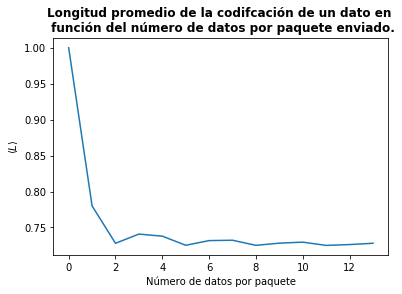

In [31]:
import matplotlib.pyplot as plt

plt.plot(longitudes)
plt.title("Longitud promedio de la codifcación de un dato en \n función del número de datos por paquete enviado.", 
          weight='bold')
plt.xlabel("Número de datos por paquete")
plt.ylabel(r"$\langle  L \rangle$")
plt.show();

## Conclusión

La codificación de Hamming es una manera de optimizar la forma en la que se trabaja con la información. Es un método que aprovecha las probabilidades de aparición de cierto dato y asigna un código más corto a los datos con probabilidades altas de forma que la longitud promedio sea lo más corta posible, es decir, lo más cercana al valor de la entropía de dicho conjunto de datos. 